In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
DATADIR = './data/'

In [3]:

data = pd.read_csv(DATADIR + 'factorsinroadcrashes.csv')
print("data.shape:", data.shape)
print(list(data))

data.shape: (3277, 13)
['Crash_Year', 'Crash_Police_Region', 'Crash_Severity', 'Involving_Drink_Driving', 'Involving_Driver_Speed', 'Involving_Fatigued_Driver', 'Involving_Defective_Vehicle', 'Count_Crashes', 'Count_Fatality', 'Count_Hospitalised', 'Count_Medically_Treated', 'Count_Minor_Injury', 'Count_All_Casualties']


In [4]:
for colname in list(data):
    print(colname)

Crash_Year
Crash_Police_Region
Crash_Severity
Involving_Drink_Driving
Involving_Driver_Speed
Involving_Fatigued_Driver
Involving_Defective_Vehicle
Count_Crashes
Count_Fatality
Count_Hospitalised
Count_Medically_Treated
Count_Minor_Injury
Count_All_Casualties


In [14]:
non_numeric_cols = list(data.select_dtypes(exclude=['int', 'float']).columns)
non_numeric_cols.append('Crash_Year')
non_numeric_cols

['Crash_Police_Region',
 'Crash_Severity',
 'Involving_Drink_Driving',
 'Involving_Driver_Speed',
 'Involving_Fatigued_Driver',
 'Involving_Defective_Vehicle',
 'Crash_Year']

In [15]:
data[non_numeric_cols].head()


,Crash_Police_Region,Crash_Severity,Involving_Drink_Driving,Involving_Driver_Speed,Involving_Fatigued_Driver,Involving_Defective_Vehicle,Crash_Year
0,Brisbane,Fatal,No,No,No,No,2001
1,Brisbane,Fatal,No,No,No,Yes,2001
2,Brisbane,Fatal,No,Yes,No,No,2001
3,Brisbane,Fatal,Yes,No,No,No,2001
4,Brisbane,Fatal,Yes,No,No,Yes,2001


In [63]:
print(list(data['Crash_Police_Region'].unique()))
print(list(data['Crash_Severity'].unique()))
print(list(data['Involving_Drink_Driving'].unique()))
print(list(data['Involving_Driver_Speed'].unique()))
print(list(data['Involving_Fatigued_Driver'].unique()))
print(list(data['Involving_Defective_Vehicle'].unique()))
print(list(data['Crash_Year'].unique()))

['Brisbane', 'Central', 'Northern', 'South Eastern', 'Southern', 'Unknown']
['Fatal', 'Hospitalisation', 'Medical treatment', 'Minor injury', 'Property damage only']
['No', 'Yes']
['No', 'Yes']
['No', 'Yes']
['No', 'Yes']
[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [70]:
temp_cols = non_numeric_cols
temp_cols.append('Count_Crashes')
temp = data[temp_cols]
print(temp.shape)
temp.head()


(3277, 9)


,Crash_Police_Region,Crash_Severity,Involving_Drink_Driving,Involving_Driver_Speed,Involving_Fatigued_Driver,Involving_Defective_Vehicle,Crash_Year,Count_Crashes,Count_Crashes
0,Brisbane,Fatal,No,No,No,No,2001,31,31
1,Brisbane,Fatal,No,No,No,Yes,2001,1,1
2,Brisbane,Fatal,No,Yes,No,No,2001,8,8
3,Brisbane,Fatal,Yes,No,No,No,2001,2,2
4,Brisbane,Fatal,Yes,No,No,Yes,2001,1,1


In [71]:
plot_this = temp[['Crash_Police_Region', 'Crash_Year', 'Count_Crashes']].groupby(['Crash_Police_Region', 'Crash_Year']).size().to_frame('Count_Crashes').reset_index()
print(plot_this.shape)


(101, 3)


In [72]:
result = pd.pivot_table(plot_this, values = 'Count_Crashes', index=['Crash_Year'], columns = 'Crash_Police_Region').reset_index()
print(result.shape)
result.head(5)


(18, 7)


Crash_Police_Region,Crash_Year,Brisbane,Central,Northern,South Eastern,Southern,Unknown
0,2001,44.0,44.0,41.0,39.0,39.0,19.0
1,2002,40.0,46.0,40.0,38.0,45.0,18.0
2,2003,38.0,43.0,37.0,39.0,45.0,15.0
3,2004,36.0,46.0,41.0,38.0,43.0,9.0
4,2005,38.0,41.0,45.0,38.0,45.0,5.0


In [73]:
result.fillna(0, inplace=True)


Text(0, 0.5, '# of Crashes')

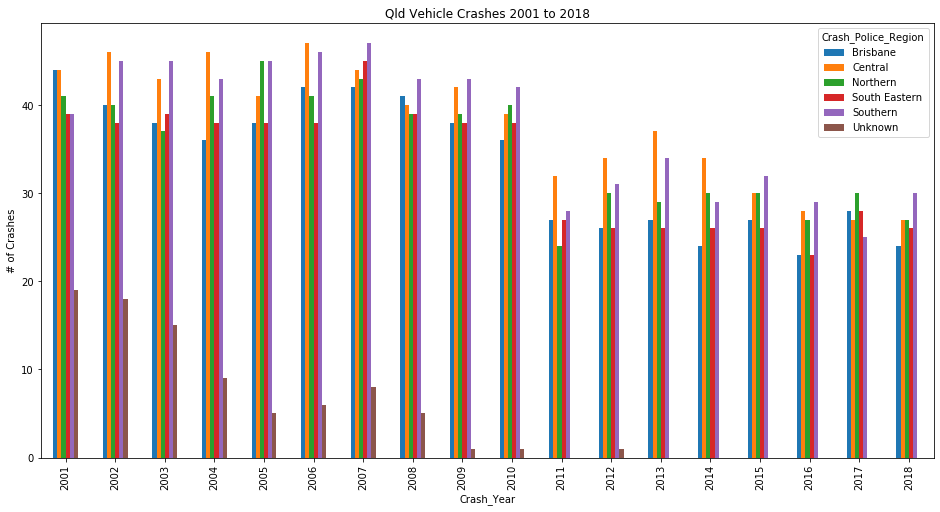

In [66]:
ax = result.plot(x="Crash_Year", 
            y=['Brisbane', 'Central', 'Northern', 'South Eastern', 'Southern', 'Unknown'], 
            kind="bar",
            figsize=(16,8), 
            title = "Qld Vehicle Crashes 2001 to 2018")
ax.set_ylabel("# of Crashes")

In [68]:
def multiBarPlot(df, feature):
    '''
    produce multi bar plot for feature vs 'Crash_Police_Region', 'Crash_Year'
    df : pandas dataframe with only columns required for plotting
    feature : name of column to plot. 
    Assumes
    'Crash_Year' = column for years.
    'Crash_Police_Region' = column for pivoting.
    
    '''
    plot_this = df[['Crash_Police_Region', 'Crash_Year', feature]].groupby(['Crash_Police_Region', 'Crash_Year']).size().to_frame(feature).reset_index()
    print("plot_this.shape:", plot_this.shape)
    result = pd.pivot_table(plot_this, values = feature, index=['Crash_Year'], columns = 'Crash_Police_Region').reset_index()
    print("result.shape:", result.shape)
    result.fillna(0, inplace=True)
    result.plot(x="Crash_Year", 
            y=['Brisbane', 'Central', 'Northern', 'South Eastern', 'Southern', 'Unknown'], 
            kind="bar",
            figsize=(16,8))

plot_this.shape: (101, 3)
result.shape: (18, 7)


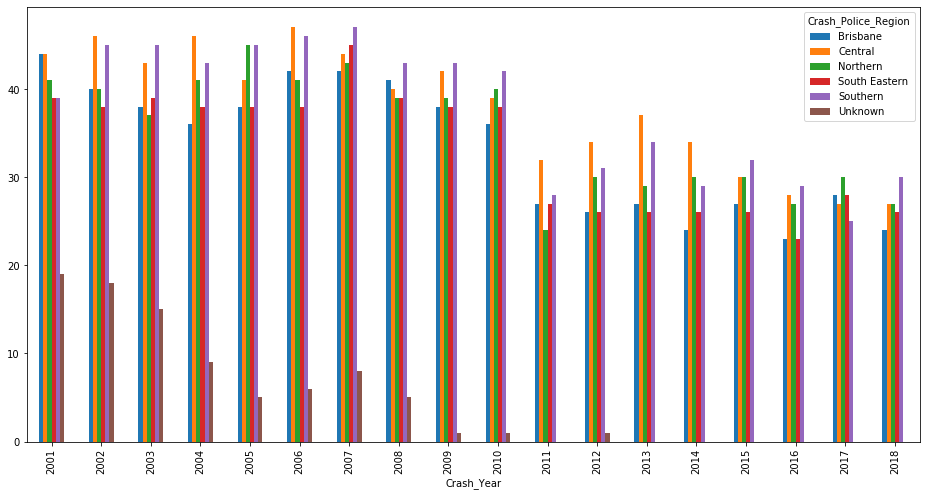

In [69]:
multiBarPlot(temp, 'Count_Crashes')

In [ ]:
#now do a multi bar plot to show 'Crash_Severity' vs years.
temp_cols = non_numeric_cols
temp_cols.append('Count_Crashes')
temp = data[temp_cols]
print(temp.shape)
temp.head()